In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [ ]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [ ]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [ ]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [ ]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)



In [ ]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [ ]:
from gensim.models import Word2Vec
from keras.preprocessing.text import text_to_word_sequence

text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, vector_size=128)
words = list(embeddings_model.wv.index_to_key)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])


76904 WORDS 
Printing first 100:
['the', 'and', 'was', 'to', 'a', 'room', 'in', 'very', 'staff', 'of', 'for', 'location', 'hotel', 'is', 'i', 'we', 'it', 'were', 'not', 'breakfast', 'good', 'with', 'great', 'but', 'on', 'at', 'friendly', 't', 'had', 'from', 'helpful', 'bed', 'no', 'nice', 'that', 'clean', 'rooms', 'have', 'you', 'as', 'there', 'this', 'so', 'our', 'comfortable', 'excellent', 'all', 'my', 'are', 'small', 'they', 'be', 'would', 'stay', 'nothing', 'service', 'really', 'bathroom', 'which', 'out', 'could', 'when', 'one', 'too', 'us', 'bar', 'only', 'lovely', 'an', 'everything', 'close', 's', 'also', 'shower', 'like', 'station', 'night', 'just', 'reception', 'if', 'well', 'bit', 'didn', 'or', 'little', 'get', 'perfect', 'more', 'by', 'food', 'time', 'view', 'area', 'me', 'walk', 'check', 'up', 'been', 'did', 'day']


In [ ]:
import keras

In [ ]:
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [ ]:
vocabSize = len(tokenizer.word_index) + 1
print(vocabSize)

# Recreating embeddings index based on Tokenizer vocabulary
word2vec_vocabulary = embeddings_model.wv.key_to_index
embeddingIndex = dict()
counter = 0
for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary:
        embeddingIndex[word] = embeddings_model.wv[word]
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))

# Prepare embeddings matrix
embeddingMatrix = zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector


76905
0 words without pre-trained embedding!


In [ ]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [ ]:
pip install pydot graphviz

In [ ]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import concatenate

Epoch 1/5
353/353 [==============================] - 34s 94ms/step - loss: 0.4322 - acc: 0.7877
Epoch 2/5
353/353 [==============================] - 33s 94ms/step - loss: 0.2771 - acc: 0.9067
Epoch 3/5
353/353 [==============================] - 37s 105ms/step - loss: 0.2330 - acc: 0.9246
Epoch 4/5
353/353 [==============================] - 38s 106ms/step - loss: 0.2084 - acc: 0.9369
Epoch 5/5
353/353 [==============================] - 37s 106ms/step - loss: 0.1848 - acc: 0.9434


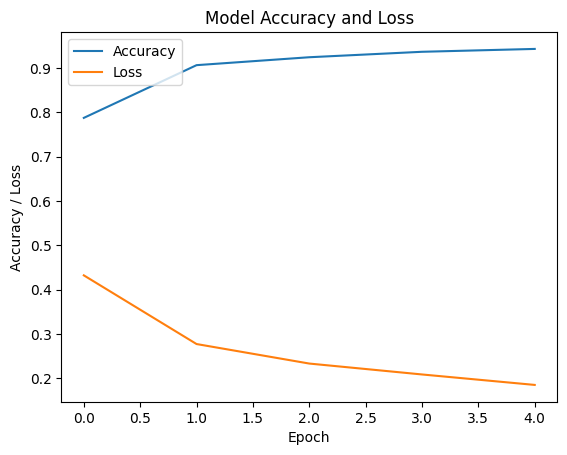

In [ ]:
import keras
import matplotlib.pyplot as plt

# Assuming you have defined vocabSize, embeddingMatrix, X_train, y_train

NN = keras.models.Sequential()
NN.add(keras.layers.Embedding(vocabSize, 128, weights=[embeddingMatrix], input_length=40, trainable=True))
NN.add(keras.layers.Conv1D(filters=32, kernel_size=4, padding='valid', activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.MaxPooling1D())
NN.add(keras.layers.Conv1D(filters=32, kernel_size=6, padding='valid', activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.MaxPooling1D())
NN.add(keras.layers.Flatten())
NN.add(keras.layers.Dense(10, activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.Dense(1, activation='sigmoid'))
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Define a callback to store training history
history = NN.fit(X_train, y_train, epochs=5, verbose=1, callbacks=[keras.callbacks.History()])

# Plot training history (accuracy and loss)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()


In [ ]:
loss, accuracy = NN.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

174/174 [==============================] - 0s 2ms/step - loss: 0.1950 - acc: 0.9268
Test Loss: 0.19500099122524261
Test Accuracy: 0.9268380403518677


174/174 [==============================] - 0s 2ms/step


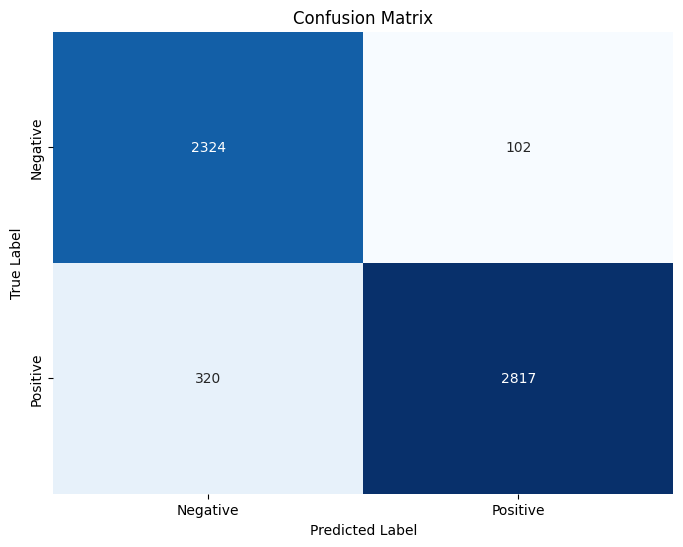

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming NN is already trained and you have X_test and y_test prepared

# Obtain predictions from the model
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


In [ ]:
# Assuming NN is already trained and you have X_test and y_test prepared

# Obtain predictions from the model
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Generate classification report
report = classification_report(y_test, predicted_classes, target_names=['0', '1'])
print(report)


174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2426
           1       0.97      0.90      0.93      3137

    accuracy                           0.92      5563
   macro avg       0.92      0.93      0.92      5563
weighted avg       0.93      0.92      0.92      5563



In [ ]:
loss, accuracy = NN.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

174/174 [==============================] - 0s 2ms/step - loss: 0.1979 - acc: 0.9241
Test Loss: 0.19794435799121857
Test Accuracy: 0.9241416454315186


174/174 [==============================] - 0s 3ms/step


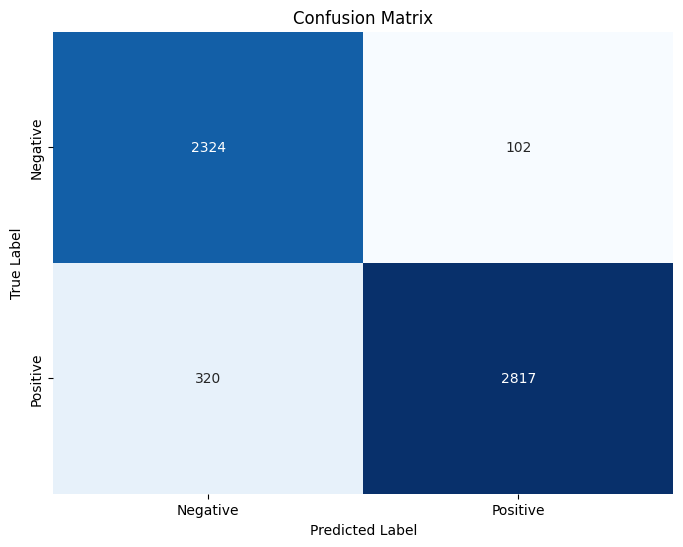

Matthews Correlation Coefficient: 0.849966594428849


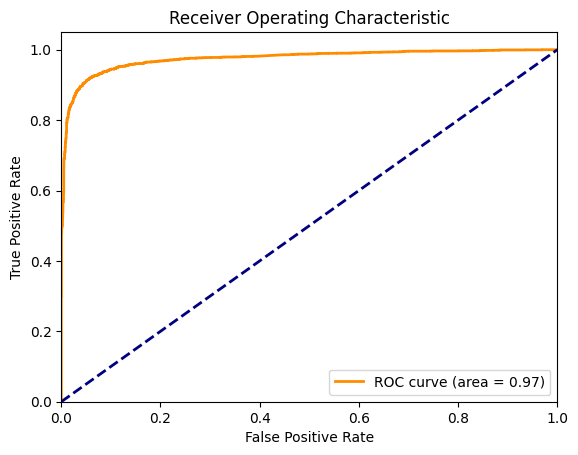

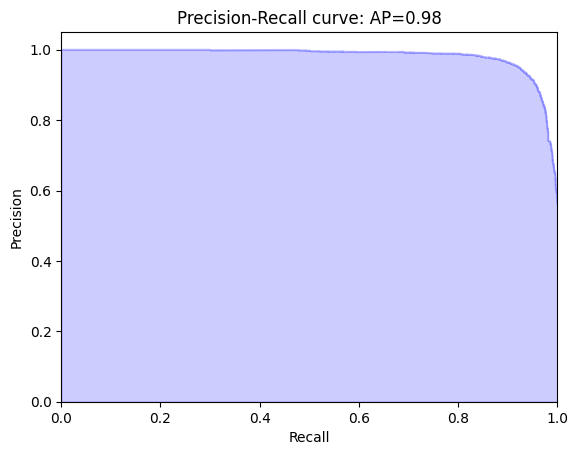

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef

# Assuming NN is already trained and you have X_test and y_test prepared
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, predicted_classes)
print("Matthews Correlation Coefficient:", mcc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
average_precision = average_precision_score(y_test, predictions)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


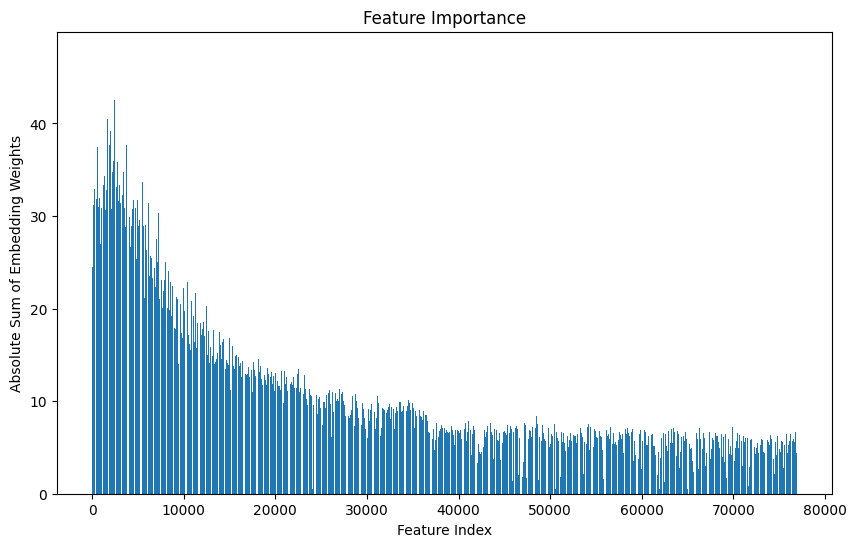

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model1 and embedding_weights are defined
embedding_weights = NN.layers[0].get_weights()[0]

# Calculate the absolute sum of embedding weights for each feature
feature_importance = np.sum(np.abs(embedding_weights), axis=1)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Sum of Embedding Weights')
plt.title('Feature Importance')
plt.show()
